# پیتر و گرگ: مقدمه‌ای بر یادگیری تقویتی

در این آموزش، یاد می‌گیریم که چگونه یادگیری تقویتی را برای مسئله‌ی یافتن مسیر به کار ببریم. این سناریو از داستان موسیقیایی [پیتر و گرگ](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) اثر آهنگساز روسی [سرگئی پروکفیف](https://en.wikipedia.org/wiki/Sergei_Prokofiev) الهام گرفته شده است. این داستان درباره‌ی پیشاهنگ جوانی به نام پیتر است که شجاعانه از خانه‌اش بیرون می‌رود تا در جنگل به دنبال گرگ بگردد. ما الگوریتم‌های یادگیری ماشین را آموزش خواهیم داد که به پیتر کمک می‌کنند تا منطقه‌ی اطراف را کشف کند و یک نقشه‌ی ناوبری بهینه بسازد.

ابتدا، بیایید مجموعه‌ای از کتابخانه‌های مفید را وارد کنیم:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## مروری بر یادگیری تقویتی

**یادگیری تقویتی** (RL) یک تکنیک یادگیری است که به ما امکان می‌دهد رفتار بهینه یک **عامل** را در یک **محیط** با انجام آزمایش‌های متعدد یاد بگیریم. عامل در این محیط باید یک **هدف** داشته باشد که توسط یک **تابع پاداش** تعریف می‌شود.

## محیط

برای ساده‌تر کردن موضوع، بیایید دنیای پیتر را به یک صفحه مربعی با اندازه `width` x `height` در نظر بگیریم. هر سلول در این صفحه می‌تواند یکی از موارد زیر باشد:
* **زمین**، که پیتر و موجودات دیگر می‌توانند روی آن راه بروند
* **آب**، که به وضوح نمی‌توانید روی آن راه بروید
* **درخت** یا **چمن** - مکانی که می‌توانید در آن استراحت کنید
* **سیب**، که چیزی است که پیتر خوشحال می‌شود پیدا کند تا خودش را تغذیه کند
* **گرگ**، که خطرناک است و باید از آن اجتناب کرد

برای کار با محیط، ما یک کلاس به نام `Board` تعریف خواهیم کرد. برای جلوگیری از شلوغ شدن بیش از حد این دفترچه، تمام کدهای مربوط به کار با صفحه را به یک ماژول جداگانه به نام `rlboard` منتقل کرده‌ایم که اکنون آن را وارد می‌کنیم. شما می‌توانید داخل این ماژول را بررسی کنید تا جزئیات بیشتری درباره پیاده‌سازی داخلی آن به دست آورید.


حالا بیایید یک صفحه تصادفی ایجاد کنیم و ببینیم چگونه به نظر می‌رسد:


In [4]:
# code block 1

## اقدامات و سیاست‌ها

در مثال ما، هدف پیتر پیدا کردن یک سیب است، در حالی که باید از گرگ و سایر موانع دوری کند. این اقدامات را به صورت یک دیکشنری تعریف کنید و آنها را به جفت‌های تغییرات مختصات مربوطه نگاشت کنید.


In [5]:
# code block 2

استراتژی عامل ما (پیتر) با چیزی که به آن **سیاست** گفته می‌شود تعریف شده است. بیایید ساده‌ترین سیاست به نام **حرکت تصادفی** را در نظر بگیریم.

## حرکت تصادفی

بیایید ابتدا مسئله خود را با پیاده‌سازی یک استراتژی حرکت تصادفی حل کنیم.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## تابع پاداش

برای هوشمندتر کردن سیاست خود، باید بفهمیم کدام حرکات "بهتر" از بقیه هستند.


In [8]:
#code block 5

## یادگیری Q

ساخت یک جدول Q یا آرایه چند‌بعدی. از آنجا که صفحه ما ابعاد `width` x `height` دارد، می‌توانیم جدول Q را با یک آرایه numpy با شکل `width` x `height` x `len(actions)` نمایش دهیم:


In [9]:
# code block 6

جدول Q را به تابع `plot` بدهید تا جدول روی تخته نمایش داده شود:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## ماهیت Q-Learning: معادله بلمن و الگوریتم یادگیری

یک شبه‌کد برای الگوریتم یادگیری خود بنویسید:

* مقداردهی اولیه جدول Q با اعداد برابر برای تمام حالت‌ها و اقدامات
* تنظیم نرخ یادگیری $\alpha\leftarrow 1$
* شبیه‌سازی را چندین بار تکرار کنید
   1. از یک موقعیت تصادفی شروع کنید
   1. تکرار کنید
        1. یک اقدام $a$ در حالت $s$ انتخاب کنید
        2. اقدام را اجرا کرده و به حالت جدید $s'$ بروید
        3. اگر به شرایط پایان بازی رسیدیم یا مجموع پاداش خیلی کم بود - شبیه‌سازی را متوقف کنید  
        4. پاداش $r$ را در حالت جدید محاسبه کنید
        5. تابع Q را طبق معادله بلمن به‌روزرسانی کنید: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. مجموع پاداش را به‌روزرسانی کرده و $\alpha$ را کاهش دهید.

## بهره‌برداری در مقابل اکتشاف

بهترین رویکرد، ایجاد تعادل بین اکتشاف و بهره‌برداری است. هرچه بیشتر درباره محیط خود یاد بگیریم، احتمال بیشتری وجود دارد که مسیر بهینه را دنبال کنیم، اما گاهی انتخاب مسیر ناشناخته نیز مفید است.

## پیاده‌سازی در پایتون

اکنون آماده‌ایم تا الگوریتم یادگیری را پیاده‌سازی کنیم. پیش از آن، به یک تابع نیاز داریم که اعداد دلخواه در جدول Q را به یک بردار احتمالات برای اقدامات مربوطه تبدیل کند:


In [10]:
# code block 7

ما مقدار کمی `eps` به بردار اصلی اضافه می‌کنیم تا از تقسیم بر صفر در حالت اولیه، زمانی که تمام مؤلفه‌های بردار یکسان هستند، جلوگیری کنیم.

الگوریتم یادگیری واقعی که اجرا خواهیم کرد برای ۵۰۰۰ آزمایش، که به آن **دوره‌ها** نیز گفته می‌شود:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

پس از اجرای این الگوریتم، جدول Q باید با مقادیری به‌روزرسانی شود که جذابیت اقدامات مختلف را در هر مرحله تعریف می‌کنند. جدول را در اینجا تجسم کنید:


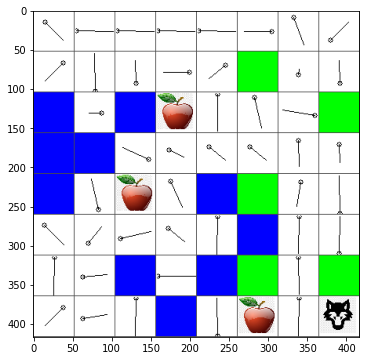

In [43]:
m.plot(Q)

## بررسی سیاست

از آنجا که Q-Table "جذابیت" هر عمل را در هر حالت فهرست می‌کند، استفاده از آن برای تعریف ناوبری کارآمد در دنیای ما بسیار آسان است. در ساده‌ترین حالت، می‌توانیم به سادگی عملی را انتخاب کنیم که با بالاترین مقدار Q-Table مطابقت دارد:


In [13]:
# code block 9

2

اگر کد بالا را چندین بار امتحان کنید، ممکن است متوجه شوید که گاهی اوقات فقط "متوقف می‌شود" و شما مجبورید دکمه توقف را در نوت‌بوک فشار دهید تا آن را قطع کنید.

> **وظیفه ۱:** تابع `walk` را تغییر دهید تا حداکثر طول مسیر را به تعداد مشخصی از مراحل (مثلاً ۱۰۰) محدود کند و مشاهده کنید که کد بالا گاهی این مقدار را بازمی‌گرداند.

> **وظیفه ۲:** تابع `walk` را تغییر دهید به‌گونه‌ای که به مکان‌هایی که قبلاً در آن‌ها بوده است بازنگردد. این کار از حلقه زدن `walk` جلوگیری می‌کند، اما همچنان ممکن است عامل در مکانی "گیر بیفتد" که نتواند از آن فرار کند.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


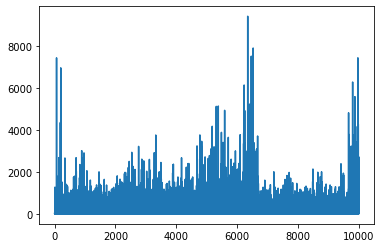

In [57]:
plt.plot(lpath)

## تمرین
## دنیای واقعی‌تر از پیتر و گرگ



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما برای دقت تلاش می‌کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادقتی‌هایی باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، ترجمه حرفه‌ای انسانی توصیه می‌شود. ما هیچ مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
